# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [75]:
class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'random':
            self.centroids = 1 * np.random.random_sample((self.k, X.shape[1])) - 0.5

        elif self.init == 'k-means':
            self.centroids[0] = X[np.random.choice(len(X), 1)]

            for j in range(1, self.k):
                d_x2 = np.array(np.min(cdist(X, self.centroids[:j]) ** 2, axis = 1)) 
                Sum = np.sum(d_x2) * np.random.rand()
                Sum2 = 0
            
                for i in range(len(X)):

                    Sum2 += d_x2[i]
                    
                    if Sum2 > Sum:
                        self.centroids[j] = X[i]
                        break 
        eps = 1e-10
        
        for it in range(self.max_iter):
            old_centroids = copy(self.centroids)

            self.labels = np.array(np.argmin(cdist(X, self.centroids), axis = 1))
            control_dist = 0
            
            for i in range(self.k):
                self.centroids[i] = np.mean(X[self.labels == i], axis = 0)
                control_dist += euclidean(old_centroids[i], self.centroids[i])
           
            if control_dist < eps:
                return self
        
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        
        self.labels = np.array(np.argmin(cdist(X, self.centroids), axis = 1))
        return self.labels


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=3, b=20, metric='euclidean', max_iter=1000, random_state=1, init='random'):
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.b = b
    
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел.
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X.
        self.labels = np.empty(X.shape[0])

        # Массив с центроидами кластеров.
        self.centroids = np.empty((self.k, X.shape[1]))
        
        if self.init == 'random':
            self.centroids = 1 * np.random.random_sample((self.k, X.shape[1])) - 0.5
            
        elif self.init == 'k-means':
            self.centroids[0] = X[np.random.choice(len(X), 1)]
            
            for j in range(1, self.k):
                d_x2 = np.array(np.min(cdist(X, self.centroids[:j]) ** 2, axis = 1))
                Sum = np.sum(d_x2) * np.random.rand()
                Sum2 = 0
            
                for i in range(len(X)):             
                    Sum2 += d_x2[i]
                    
                    if Sum2 > Sum:
                        self.centroids[j] = X[i]
                        break
    
        eps = 1e-10
        
        for it in range(self.max_iter):
            b_Points = X[np.random.choice(len(X), self.b)]
            old_centroids = copy(self.centroids)        
            self.labels = np.array(np.argmin(cdist(b_Points, self.centroids), axis = 1))
            control_dist = 0
            cluster_points = [[]] * self.k
            
            for j in range(len(b_Points)):         
                i = self.labels[j]
                cluster_points[i].append(b_Points[j])
                n = 1 / len(cluster_points[i])
                self.centroids[i] = (1 - n) * self.centroids[i] + n * b_Points[j]
            
            for j in range(self.k):
                control_dist += euclidean(old_centroids[j], self.centroids[j])
      
            if control_dist < eps:
                return self
        
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [87]:
from sklearn.datasets import make_blobs

In [88]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

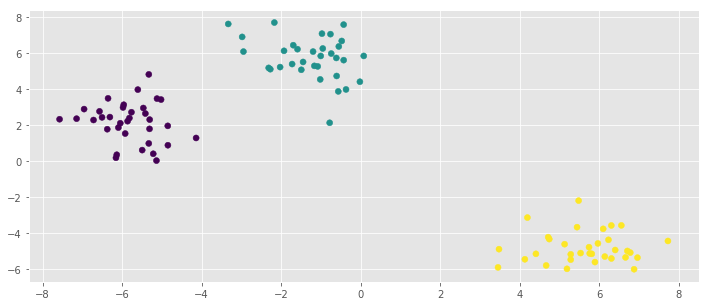

In [89]:
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

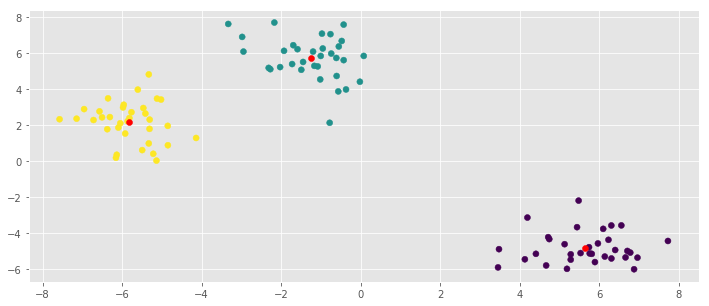

In [90]:
## Работоспособность MyKmeans
model = MyKmeans(k=3)
model.fit(X, y)
r = model.predict(X)
plt.scatter(X[:,0], X[:, 1], c=r)
centroids = np.array(model.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='r')
plt.show()

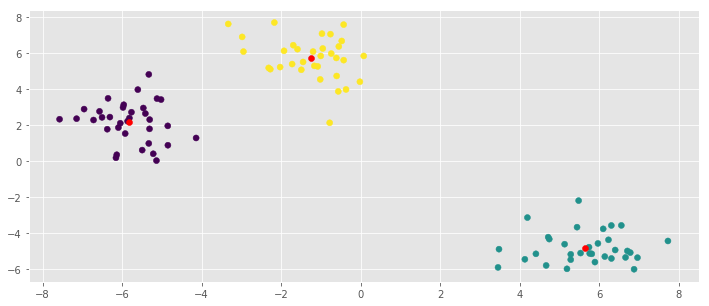

In [91]:
## Работоспособность MyKmeans++
model = MyKmeans(k=3, init='k-means')
model.fit(X, y)
r = model.predict(X)
plt.scatter(X[:,0], X[:, 1], c=r)
centroids = np.array(model.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='r')
plt.show()

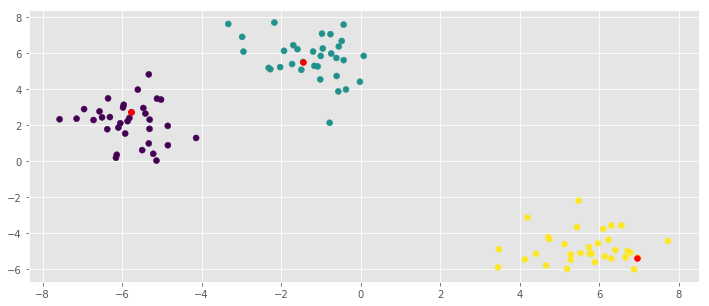

In [92]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
model = MiniBatchKMeans(k=3)
model.fit(X, y)
r = model.predict(X)
plt.scatter(X[:,0], X[:, 1], c=r)
centroids = np.array(model.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='r')
plt.show()

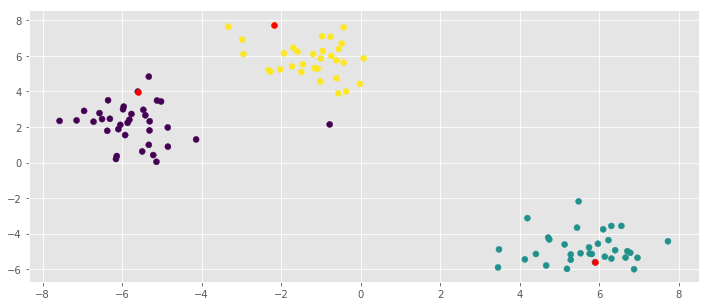

In [93]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
model = MiniBatchKMeans(k=3, init='k-means')
model.fit(X, y)
r = model.predict(X)
plt.scatter(X[:,0], X[:, 1], c=r)
centroids = np.array(model.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='r')
plt.show()

In [94]:
import time
sample_num_list = [100 + 50 * x for x in range(5)]
time_list = [0] * len(sample_num_list)

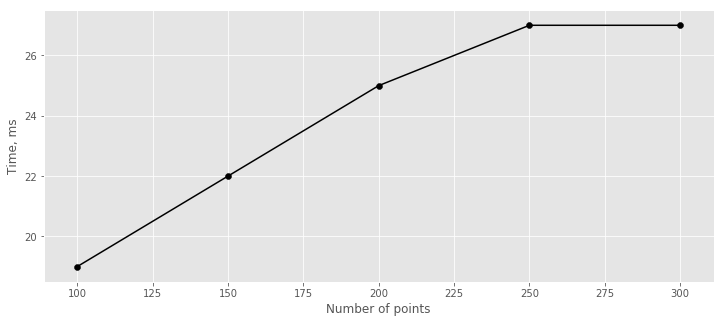

In [98]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans

for i, n in enumerate(sample_num_list):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    s = time.time()
    model = KMeans(n_clusters=3)
    model.fit(X)
    f = time.time()
    time_list[i] = (f-s)*1000

plt.plot(sample_num_list, time_list, c='k')
plt.scatter(sample_num_list, time_list, c='k')
plt.xlabel('Number of points')
plt.ylabel('Time, ms')
plt.show()

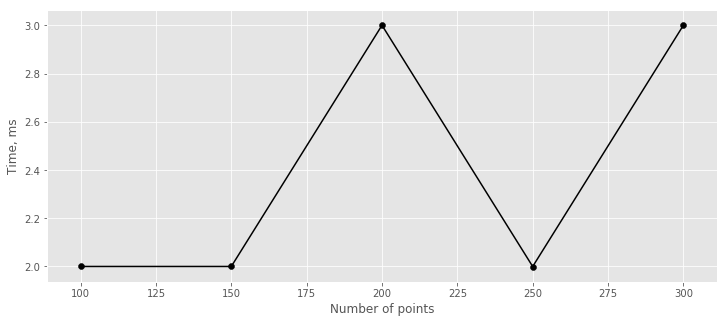

In [118]:
## Время выполнения алгоритма MyKmeans

for i, n in enumerate(sample_num_list):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    s = time.time()
    model = MyKmeans(k=3)
    model.fit(X)
    f = time.time()
    time_list[i] = (f-s)*1000

plt.plot(sample_num_list, time_list, c='k')
plt.scatter(sample_num_list, time_list, c='k')
plt.xlabel('Number of points')
plt.ylabel('Time, ms')
plt.show()

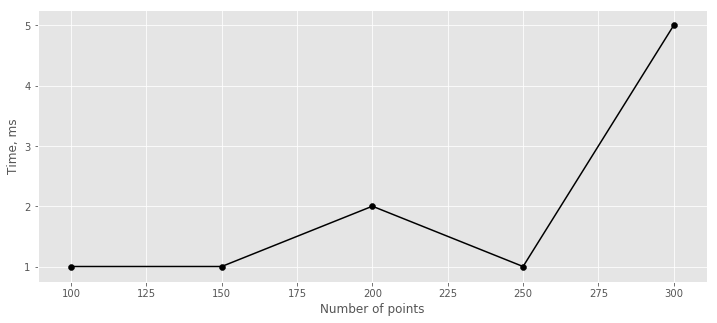

In [121]:
## Время выполнения алгоритма MyKmeans++

for i, n in enumerate(sample_num_list):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    s = time.time()
    model = MyKmeans(k=3, init= 'k-means')
    model.fit(X)
    f = time.time()
    time_list[i] = (f-s)*1000

plt.plot(sample_num_list, time_list, c='k')
plt.scatter(sample_num_list, time_list, c='k')
plt.xlabel('Number of points')
plt.ylabel('Time, ms')
plt.show()

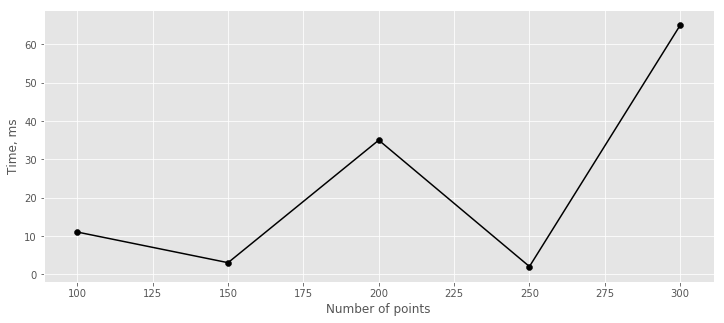

In [122]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

for i, n in enumerate(sample_num_list):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    s = time.time()
    model = MiniBatchKMeans(k=3, random_state=1234, init='random')
    model.fit(X)
    f = time.time()
    time_list[i] = (f-s)*1000

plt.plot(sample_num_list, time_list, c='k')
plt.scatter(sample_num_list, time_list, c='k')
plt.xlabel('Number of points')
plt.ylabel('Time, ms')
plt.show()

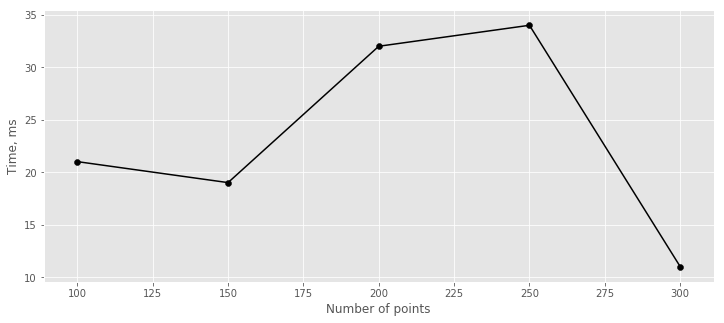

In [123]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

for i, n in enumerate(sample_num_list):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    s = time.time()
    model = MiniBatchKMeans(k=3, random_state=1234, init='k-means')
    model.fit(X)
    f = time.time()
    time_list[i] = (f-s)*1000

plt.plot(sample_num_list, time_list, c='k')
plt.scatter(sample_num_list, time_list, c='k')
plt.xlabel('Number of points')
plt.ylabel('Time, ms')
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [160]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [161]:
#drop unnecessary features
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis = 1);

# Normalize
for i in df_sns.columns:
    df_sns[i] = (df_sns[i] - df_sns[i].mean()) / df_sns[i].std()
    

In [176]:
def cluster_desc(l_sns):    
    for (c, group) in l_sns.groupby('label'):
        print('cluster: %d' % c)
        print('size: %d' % len(group))
        print(group.iloc[:,:-1].mean().nlargest(5))
        print '\n'

In [178]:
%%time
## Kmeans

model = MyKmeans(k=9)
model.fit(df_sns.values)
y = model.predict(df_sns)
l_sns = df_sns
l_sns.loc[:, 'label'] = y

cluster_desc(l_sns)

cluster: 0
size: 860
kissed    3.402155
drugs     3.005323
hair      2.868532
sex       2.321347
drunk     1.655800
dtype: float64


cluster: 1
size: 362
bible     5.565184
jesus     3.748868
god       3.482918
church    2.097136
music     0.313008
dtype: float64


cluster: 2
size: 19791
marching    0.034757
baseball    0.007580
soccer      0.005136
band       -0.011444
softball   -0.014229
dtype: float64


cluster: 3
size: 1765
death    2.765930
die      0.399234
god      0.115044
music    0.088998
rock     0.068832
dtype: float64


cluster: 4
size: 393
volleyball    6.702846
softball      0.762452
basketball    0.730238
sports        0.491497
shopping      0.443546
dtype: float64


cluster: 5
size: 674
cheerleading    5.400472
shopping        0.514252
football        0.389032
abercrombie     0.374236
hollister       0.363283
dtype: float64


cluster: 6
size: 5195
hot         0.791959
shopping    0.623714
cute        0.599640
mall        0.498824
dance       0.484349
dtype: float64




In [180]:
%%time
## MyKMeans++

model = MyKmeans(k=9, random_state = 1234, init = 'k-means')
model.fit(df_sns.values)
y = model.predict(df_sns)
l_sns = df_sns
l_sns.loc[:, 'label'] = y

cluster_desc(l_sns)

cluster: 0
size: 395
bible     5.227615
jesus     3.645884
god       3.359014
church    2.097413
death     0.457172
dtype: float64


cluster: 1
size: 3024
basketball    1.023074
football      1.017837
volleyball    0.932295
softball      0.859025
baseball      0.851038
dtype: float64


cluster: 2
size: 211
sexy     7.825838
cute     0.643033
hot      0.418275
sex      0.353568
dance    0.347692
dtype: float64


cluster: 3
size: 437
tennis        6.501807
sports        0.208074
church        0.155160
basketball    0.119933
soccer        0.106407
dtype: float64


cluster: 4
size: 686
cheerleading    5.393071
shopping        0.510818
football        0.394570
hollister       0.366015
abercrombie     0.359273
dtype: float64


cluster: 5
size: 889
kissed    3.322108
drugs     2.973203
hair      2.801334
sex       2.230532
die       1.625259
dtype: float64


cluster: 6
size: 18806
marching    0.026945
band       -0.021211
death      -0.022068
blonde     -0.030294
jesus      -0.068149
dtype: f

In [182]:
%%time
## MyKMeans с MiniBatchMyKMeans

model = MiniBatchKMeans(k = 9, b = 50, random_state = 10)
model.fit(df_sns.values)
y = model.predict(df_sns)
l_sns = df_sns
l_sns.loc[:, 'label'] = y

cluster_desc(l_sns)

cluster: 0
size: 97
bible     7.351458
god       7.328609
jesus     6.258299
church    5.165933
death     0.658955
dtype: float64


cluster: 1
size: 149
dress       8.085681
shopping    1.634357
mall        1.578622
cute        0.860569
dance       0.627225
dtype: float64


cluster: 2
size: 40
softball      10.225403
dance          3.763058
sports         1.507245
volleyball     1.378040
hot            1.248891
dtype: float64


cluster: 3
size: 304
kissed    5.790717
drugs     4.128278
sex       3.751605
hair      3.270246
die       2.728606
dtype: float64


cluster: 4
size: 759
baseball      3.506036
basketball    2.487166
football      1.502719
rock          1.088787
sports        0.877542
dtype: float64


cluster: 5
size: 310
cheerleading    7.212249
shopping        1.053477
football        0.698741
hollister       0.458982
abercrombie     0.393924
dtype: float64


cluster: 6
size: 166
abercrombie    6.109234
cute           3.636525
hollister      2.890663
shopping       2.290267
cl

In [183]:
%%time
## MyKMeans++ с MiniBatchMyKMeans

model = MiniBatchKMeans(k = 9, init = 'k-means')
model.fit(df_sns.values)
y = model.predict(df_sns)
l_sns = df_sns
l_sns.loc[:, 'label'] = y

cluster_desc(l_sns)

cluster: 0
size: 349
soccer      6.610986
tennis      1.017190
sports      0.408447
mall        0.367265
shopping    0.363127
dtype: float64


cluster: 1
size: 55
hot            8.880854
hollister      3.049218
basketball     2.153163
cute           1.274346
abercrombie    1.117738
dtype: float64


cluster: 2
size: 240
marching    3.878798
clothes     3.300257
band        3.244202
sports      1.852196
music       1.450321
dtype: float64


cluster: 3
size: 1
sex       101.281917
church     11.692449
death       2.027874
rock        1.050379
music       0.209337
dtype: float64


cluster: 4
size: 234
jesus     6.646904
god       2.367434
bible     1.796063
music     1.789252
church    1.383098
dtype: float64


cluster: 5
size: 262
dress          5.145772
abercrombie    2.438363
shopping       1.804697
hollister      1.790686
mall           1.692756
dtype: float64


cluster: 6
size: 28553
volleyball     -0.009845
softball       -0.010736
cheerleading   -0.012645
blonde         -0.015180
sw

In [ ]:
## Вывод

## Вывод

1. Mini-batch значительно ускоряет время выполнения программы, интерпретация кластеров усложняется, выделяются только наиболее очевидные;

2. Mini-batch в каждой итерации использует только некоторую часть выборки, что зачастую критично. При наличии достаточного количества времени стоит использовать kmeans

3. Mini-batch обладает дополнительным глобальным параметром, что скажется по времени при подборе оптимальных параметров

4. K-means++ проигрывает по времени K-means